In [ ]:
#import libraries

import os
os.chdir("/content/drive/MyDrive/Pengolahan Citra")
import numpy as np
from skimage.io import imread, imshow
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import img_as_float

import cv2
from google.colab.patches import cv2_imshow

### define functions

In [ ]:
seed_value = 123; np.random.seed(seed_value);
exec(open(os.path.abspath('image_common_utils.py')).read())

In [ ]:
def plot_histogram(image, ax=None, **kwargs):
    from skimage import exposure

    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)

    return

def _plot_histogram(ax, image, alpha=0.3, **kwargs):
  hist, bin_centers = exposure.histogram(image)
  ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
  ax.set_xlabel('intensity')
  ax.set_ylabel('# pixels')
  return

In [ ]:
def imshow_with_histogram(image, **kwargs):
  width, height = plt.rcParams['figure.figsize']
  fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*width, height))

  kwargs.setdefault('cmap', plt.cm.gray)
  ax_image.imshow(image, **kwargs)
  plot_histogram(image, ax=ax_hist)
  ax_image.set_axis_off()
  match_axes_height(ax_image, ax_hist)

  return ax_image, ax_hist

In [ ]:
def iter_channels(color_image):
    """Yield color channels of an image."""
    for channel in np.rollaxis(color_image, -1):
      yield channel
    return

def match_axes_height(ax_src, ax_dst):
    """ Match the axes height of two axes objects.
    The height of `ax_dst` is synced to that of `ax_src`.
    """
    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return

## 🐦 Detect Object Colors from image background

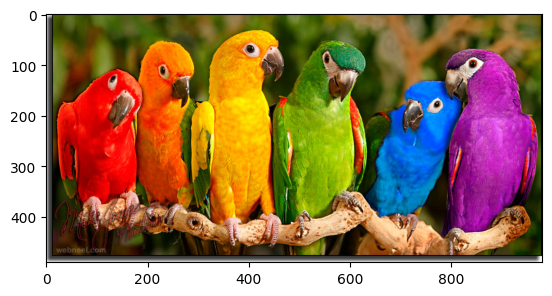

In [ ]:
img_path = './birds.jpg' # elephant
img = imread(img_path)

img.shape # H x W x C
img.size # multiplication of HxWxC
type(img)
img.dtype

plt.imshow(img)
plt.show()

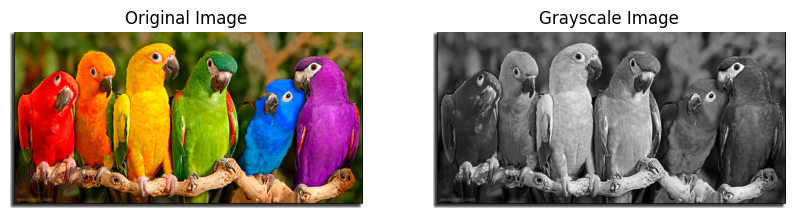

In [ ]:
# Convert the image to grayscale
im_gray = rgb2gray(img)

# Display the original and grayscale images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(im_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
plt.show()

RGB Image
R Component


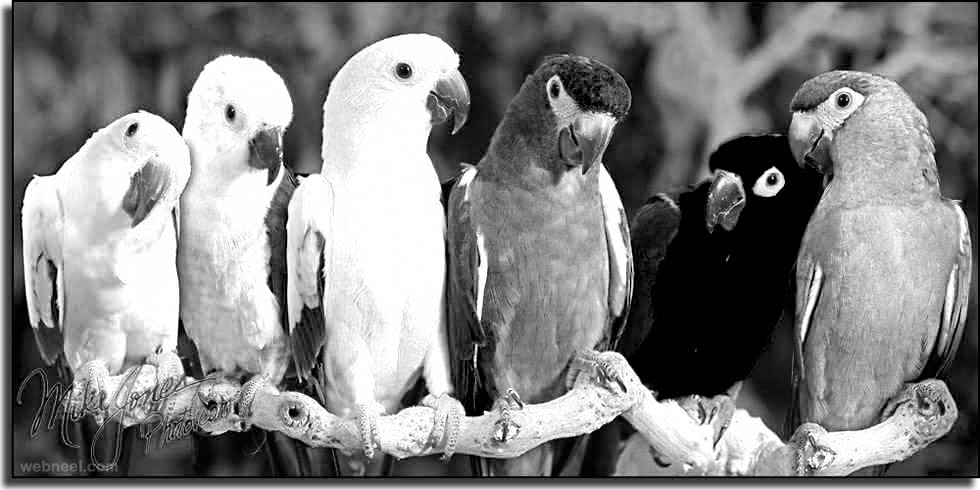

G Component


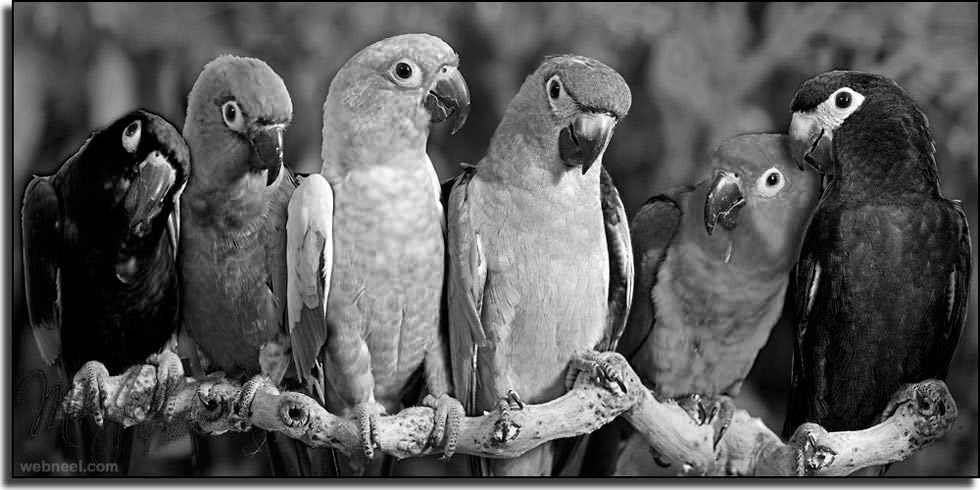

B Component


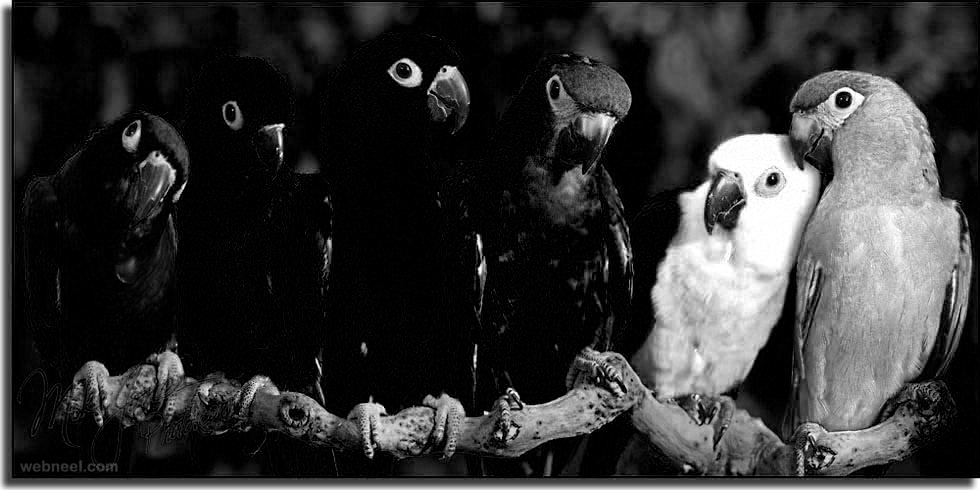

In [ ]:
# identify R G B colors

print("RGB Image")
R,G,B = cv2.split(img)
print("R Component")
cv2_imshow(R)
print("G Component")
cv2_imshow(G)
print("B Component")
cv2_imshow(B)

CMY Image
C Component


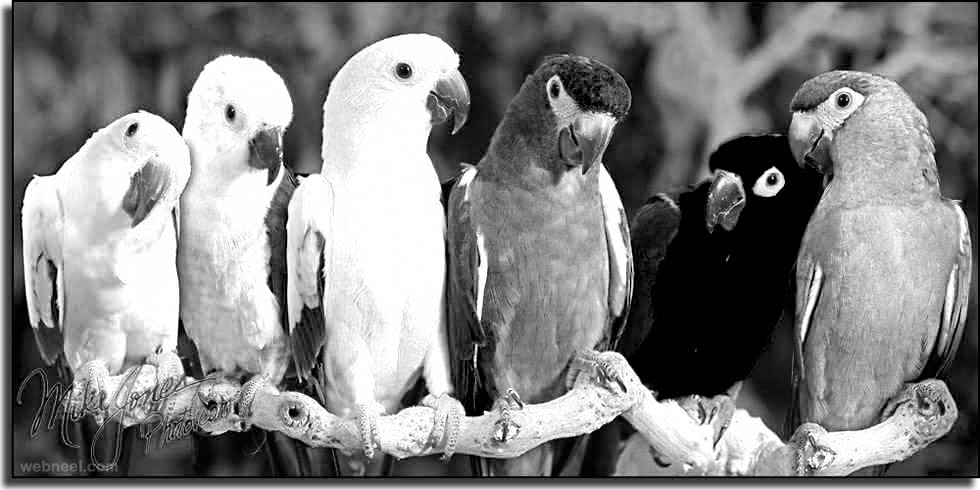

M Component


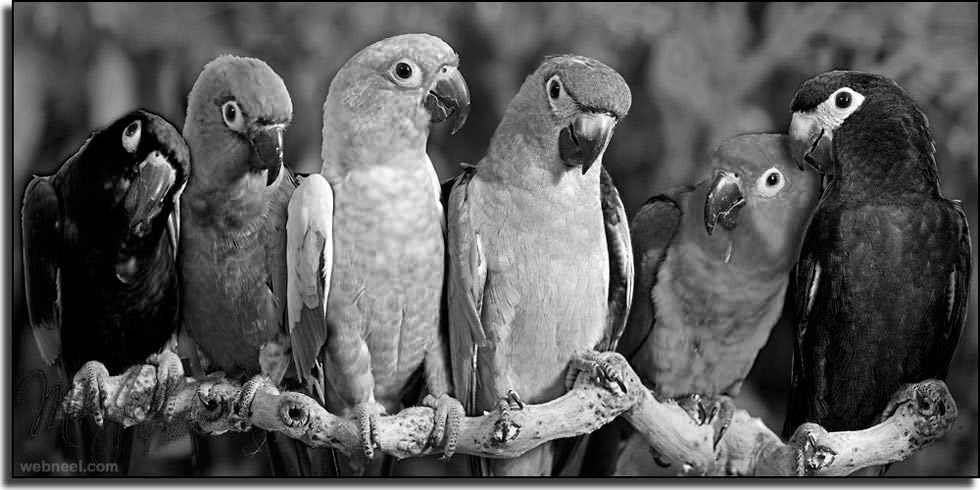

Y Component


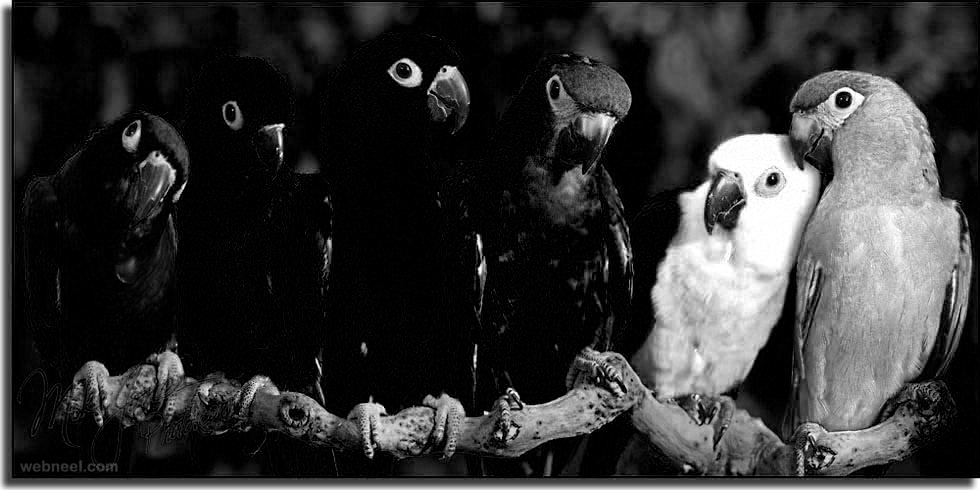

In [ ]:
# identify CMY colors

print("CMY Image")
C,M,Y = cv2.split(img)
print("C Component")
cv2_imshow(C)
print("M Component")
cv2_imshow(M)
print("Y Component")
cv2_imshow(Y)

### 🌈 Identify each color

Pixels detected in reds:  64776


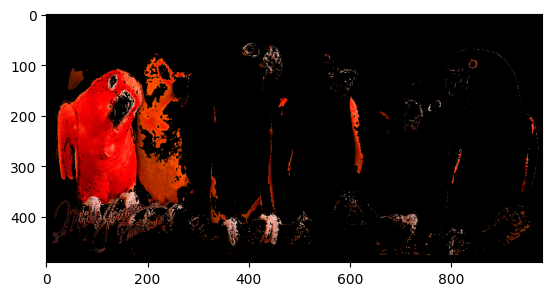

In [ ]:
# Convert RGB to HSV openCV
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

##Count red pixels
# define lower and upper color boundaries
lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
# masking
mask = cv2.inRange(hsv_image, lower_red, upper_red)

result = cv2.bitwise_and(img, img, mask=mask)

red_pixels = cv2.countNonZero(mask)

print("Pixels detected in reds: ", red_pixels)
plt.imshow(mask, cmap='gray')
plt.imshow(result)
plt.show()

Pixel detected in blue:  26833


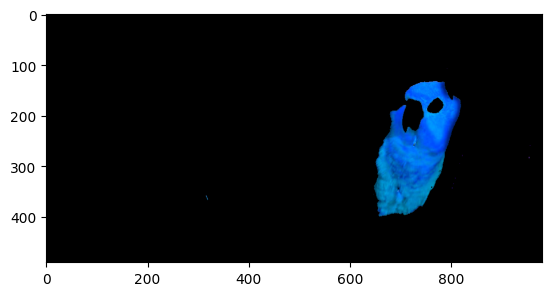

In [ ]:
## Count blue pixels
# define lower and upper color boundaries
lower_blue = (96, 156, 93)
upper_blue = (135, 255, 255)

# Threshold the image to get the desired color
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

result_blue = cv2.bitwise_and(img, img, mask=mask_blue)

blue_pixels = cv2.countNonZero(mask_blue)

print("Pixel detected in blue: ", blue_pixels)
plt.imshow(mask_blue)
plt.imshow(result_blue)
plt.show()

Pixels detected in green:  247538


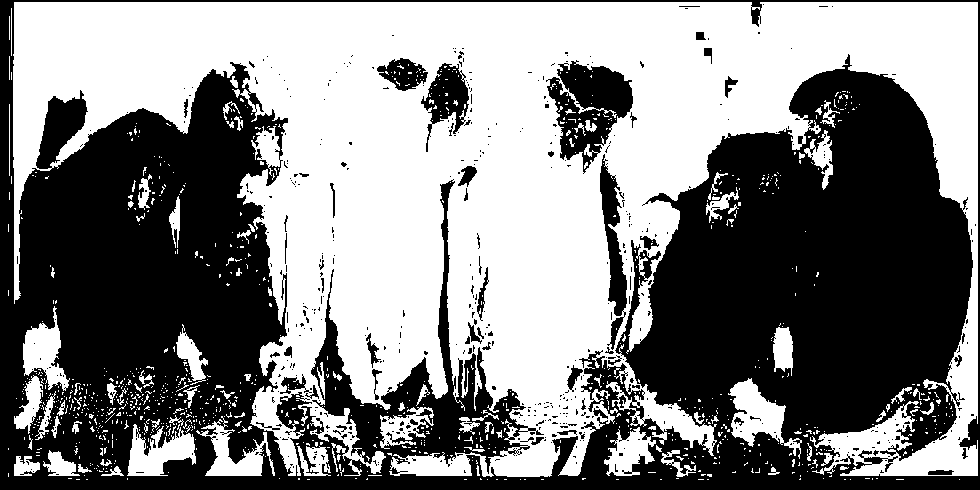

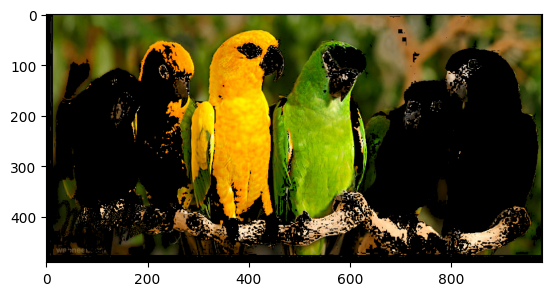

In [ ]:
## Count green pixels
# define lower and upper color boundaries
lower_green = (15, 25, 25)
upper_green = (50, 255, 255)

# Threshold the image to get the desired color
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

result_green = cv2.bitwise_and(img, img, mask=mask_green)

green_pixels = cv2.countNonZero(mask_green)

print("Pixels detected in green: ", green_pixels)
cv2_imshow(mask_green)
plt.imshow(result_green)
plt.show()

## 🪙 Detect object from background

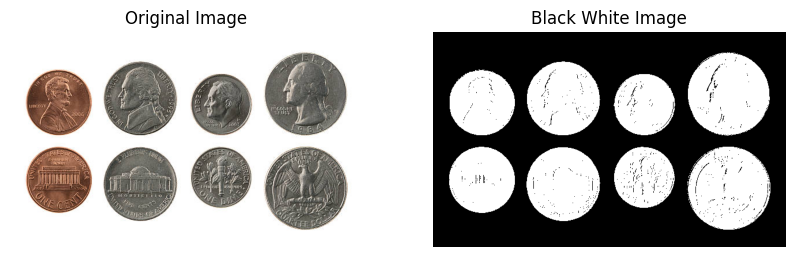

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_log
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = imread('./coin.jpg')
image_gray = rgb2gray(image) < 0.8

# Display the original and grayscale images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Black White Image')
axes[1].axis('off')
plt.show()

Number of Coins :  8


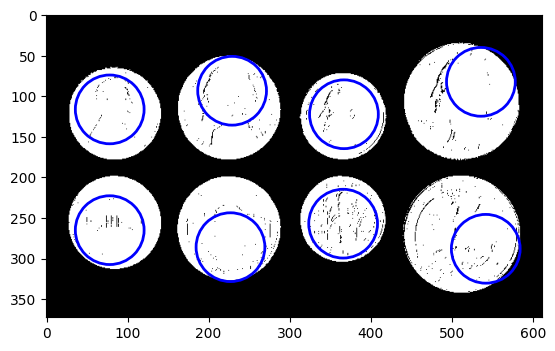

In [ ]:
blobs_log = blob_log(image_gray, max_sigma=30, min_sigma=25, num_sigma=10, threshold=.3, overlap=.2)

# Count the coins
numrows = len(blobs_log)
print("Number of Coins : " , numrows)

fig, ax = plt.subplots()
plt.imshow(image_gray, cmap=plt.get_cmap('gray'))

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r*np.sqrt(2), color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()